<a href="https://colab.research.google.com/github/rajeshpahari/Own-Work/blob/main/005_Logistic_regression_Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section -1 Multiclass Logistic regression  - Overview section

# <font color="mazenta"> 
**Problem**:

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.
</font >

<font color="violet"> 
What we are doing in this notebook?  
* Logistic regression for a multiclass target variable





</font >

# Section -2 Data Upload Section

In [5]:
# from google.colab import files
# files.upload()

# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d redwankarimsony/heart-disease-data
# !unzip /content/heart-disease-data.zip


Saving kaggle.json to kaggle.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 9.10MB/s]
Archive:  /content/heart-disease-data.zip
  inflating: heart_disease_uci.csv   


# Section -3 Libraries -Inital

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')
import seaborn as sns

# Section-4 Data Obesrvations- EDA and Roadmap preperation


In [7]:
df=pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
#lets see basic dataset informations in next two cell
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [9]:
#basic stastical data on numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


See the std dev of chol...lets see the data distribution

<Axes: xlabel='chol', ylabel='Count'>

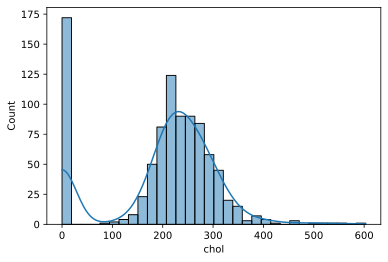

In [10]:
sns.histplot(df.chol,kde=True)

In [11]:
df.chol.value_counts()

0.0      172
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: chol, Length: 217, dtype: int64

In [12]:
df[df.chol==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.0,0.0,NaN,normal,127.0,False,0.7,upsloping,NaN,NaN,1
598,599,34,Male,Switzerland,asymptomatic,115.0,0.0,NaN,NaN,154.0,False,0.2,upsloping,NaN,NaN,1
599,600,35,Male,Switzerland,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.0,0.0,NaN,normal,125.0,True,1.0,flat,NaN,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.0,0.0,NaN,normal,166.0,False,2.8,upsloping,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.0,0.0,False,normal,120.0,False,0.5,upsloping,NaN,NaN,1
819,820,63,Male,VA Long Beach,non-anginal,130.0,0.0,True,st-t abnormality,160.0,False,3.0,flat,NaN,NaN,0
822,823,48,Male,VA Long Beach,non-anginal,102.0,0.0,NaN,st-t abnormality,110.0,True,1.0,downsloping,NaN,NaN,1
839,840,56,Male,VA Long Beach,asymptomatic,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1


0 cholesterol !!!???..is it a convincing data...or does it mean lower cholesterol...We may need to talk to domain expert on this....

In [13]:
#lets observe distrbution of target variable
print('Number of unique target class: ',df.num.nunique())
print('\n\nThe unique classes with their Values:\n',df.num.value_counts() )
print('\n\nPercentage is as folows:')
100*df.num.value_counts()/len(df)

Number of unique target class:  5


The unique classes with their Values:
 0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64


Percentage is as folows:


0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: num, dtype: float64

<font color="violet"> 
***Observations***: 
Its not an evenly distrubuted dataset....

In [14]:
#Lets create features we dont need 
drop_feat=[]
# df.head()
drop_feat.append('id')
drop_feat

['id']

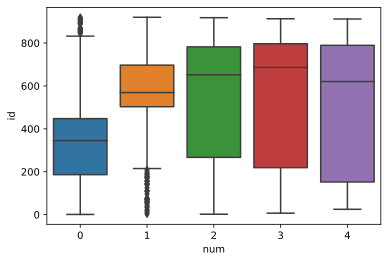

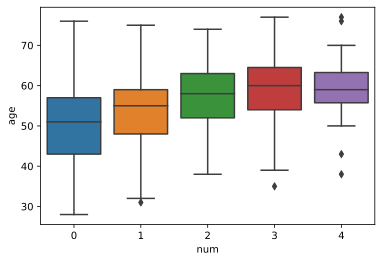

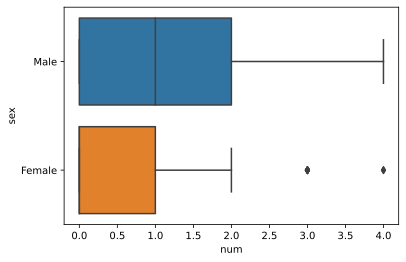

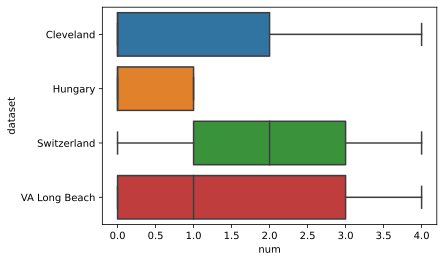

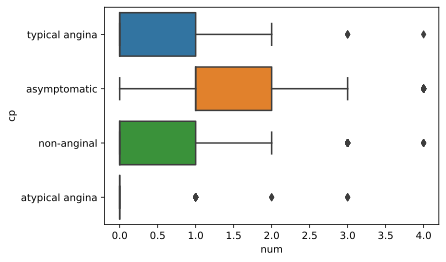

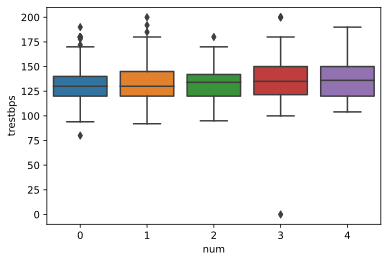

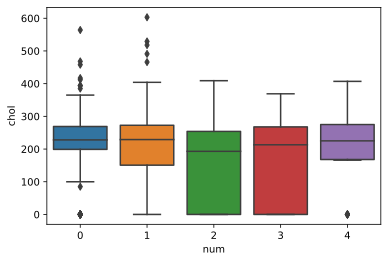

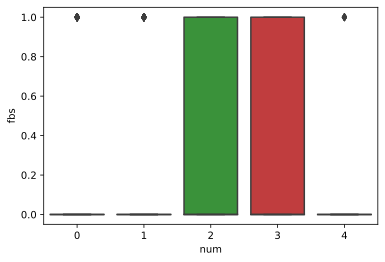

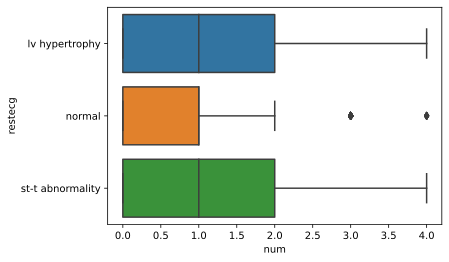

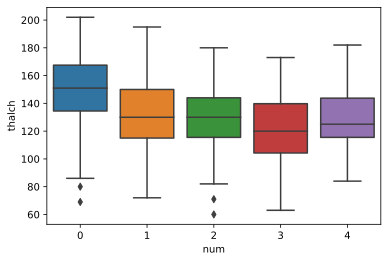

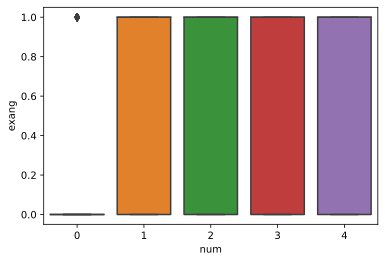

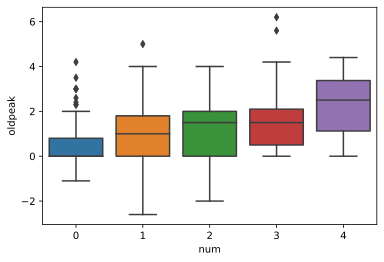

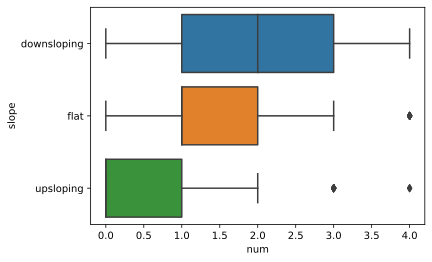

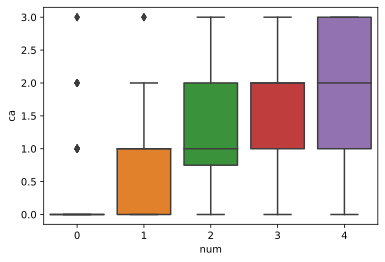

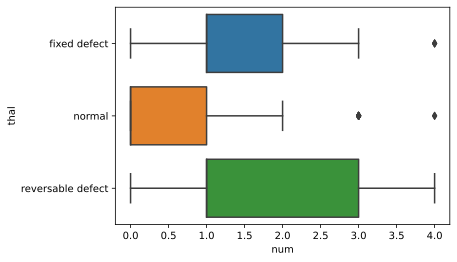

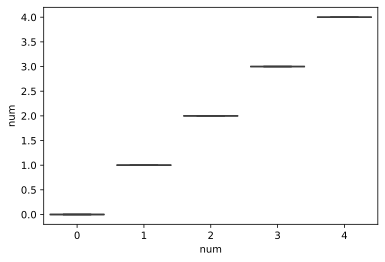

In [15]:
for i in df.columns:
  sns.boxplot(x='num',y=i,data=df)
  plt.show()
  print('\n')

<Axes: >

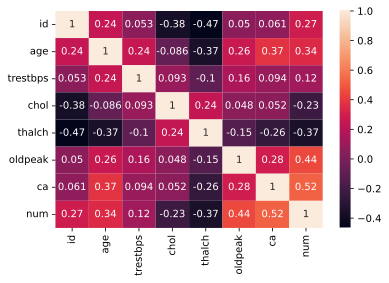

In [16]:
#Lets check relationship
sns.heatmap(df.corr(),annot=True)

Observations of data

In [17]:
df.dataset.value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [18]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [19]:
df.restecg.value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [20]:
#Investigation for missing values 
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [21]:

#create a function to check null values
def check_null_counts(df,cutoff):
  missing_percentage=100*df.isnull().sum()/len(df)
  missing_value=missing_percentage[missing_percentage>cutoff].sort_values(ascending=False)
  

  return missing_value
  

In [22]:
check_null_counts(df,0)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
dtype: float64

In [23]:
def plot_missing(missing_value):
  plt.figure(figsize=(15,8))
  sns.barplot(x=missing_value.index,y=missing_value,palette='crest')
  plt.xticks(rotation =90);

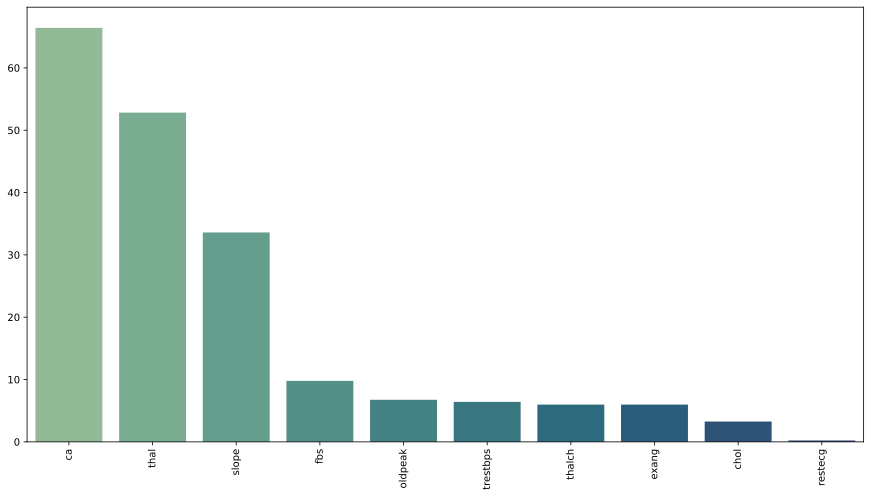

In [24]:
plot_missing(check_null_counts(df,0))

So above graph is showing the missing values for the features....now we will work on the features one by one where missing percetage is with in 10%

In [25]:
df[df.restecg.isnull()]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
571,572,55,Male,Hungary,typical angina,140.0,295.0,False,NaN,136.0,False,0.0,NaN,NaN,NaN,1
598,599,34,Male,Switzerland,asymptomatic,115.0,0.0,NaN,NaN,154.0,False,0.2,upsloping,NaN,NaN,1


We can see where restecg is NAN there ca & Thal is also NAN...lets drop these rows

In [26]:
print('length of dataframe before rows drop:',len(df))
df[df['restecg'].isnull()][['ca','thal']]
df=df.dropna(subset=['restecg','ca','thal'],axis=0,how='all')
len(df)

length of dataframe before rows drop: 920


918

#Lets see on which feature we have to work now..

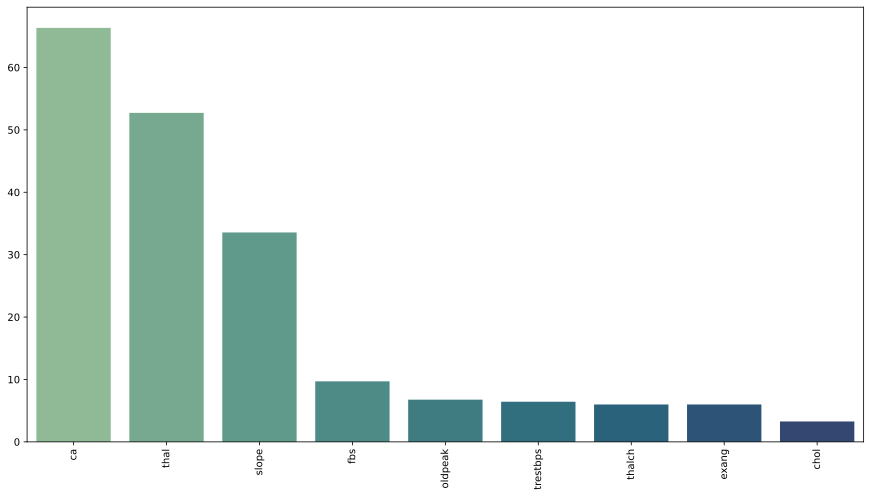

In [27]:
plot_missing(check_null_counts(df,0))

In [28]:
df[df.chol.isnull()]


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
305,306,29,Male,Hungary,atypical angina,140.0,NaN,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
334,335,39,Male,Hungary,atypical angina,120.0,NaN,False,st-t abnormality,146.0,False,2.0,upsloping,NaN,NaN,0
337,338,39,Male,Hungary,atypical angina,130.0,NaN,False,normal,120.0,False,0.0,NaN,NaN,NaN,0
347,348,40,Male,Hungary,non-anginal,140.0,NaN,False,normal,188.0,False,0.0,NaN,NaN,NaN,0
368,369,43,Female,Hungary,non-anginal,150.0,NaN,False,normal,175.0,False,0.0,NaN,NaN,normal,0
375,376,45,Female,Hungary,atypical angina,180.0,NaN,False,normal,180.0,False,0.0,NaN,NaN,NaN,0
378,379,45,Male,Hungary,non-anginal,135.0,NaN,False,normal,110.0,False,0.0,NaN,NaN,NaN,0
389,390,47,Female,Hungary,non-anginal,130.0,NaN,False,normal,145.0,False,2.0,flat,NaN,NaN,0
394,395,48,Female,Hungary,atypical angina,120.0,NaN,True,st-t abnormality,148.0,False,0.0,NaN,NaN,NaN,0
400,401,48,Male,Hungary,atypical angina,100.0,NaN,False,normal,100.0,False,0.0,NaN,NaN,NaN,0


In [29]:
df.chol.fillna(df.chol.mean(),inplace=True)

In [30]:
df.chol.isnull().sum()

0

Check next

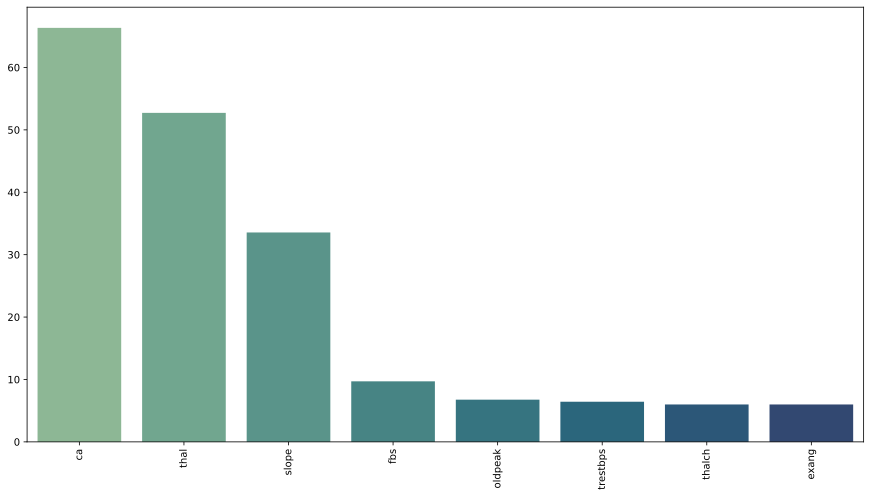

In [31]:
plot_missing(check_null_counts(df,0))

In [32]:
df.groupby('exang')['thalch'].mean()

exang
False    144.923954
True     125.985163
Name: thalch, dtype: float64

In [33]:
df.thalch.mean()

137.52838933951332

In [34]:
print('length of dataframe before rows drop:',len(df))
df1=df.dropna(subset=['exang','thalch'],axis=0,how='all')
len(df1)/920

length of dataframe before rows drop: 918


0.9380434782608695

In [35]:
df1.num.value_counts()

0    391
1    250
2    102
3     94
4     26
Name: num, dtype: int64

<Axes: xlabel='num', ylabel='count'>

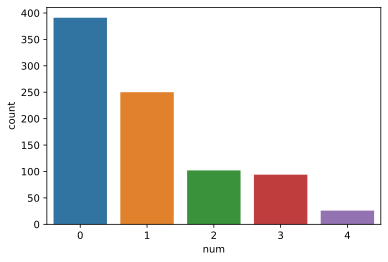

In [36]:
sns.countplot(data=df1,x='num')

So we will loose 7% data ..which is huge...however we dont have any convenient method to impute the missing values

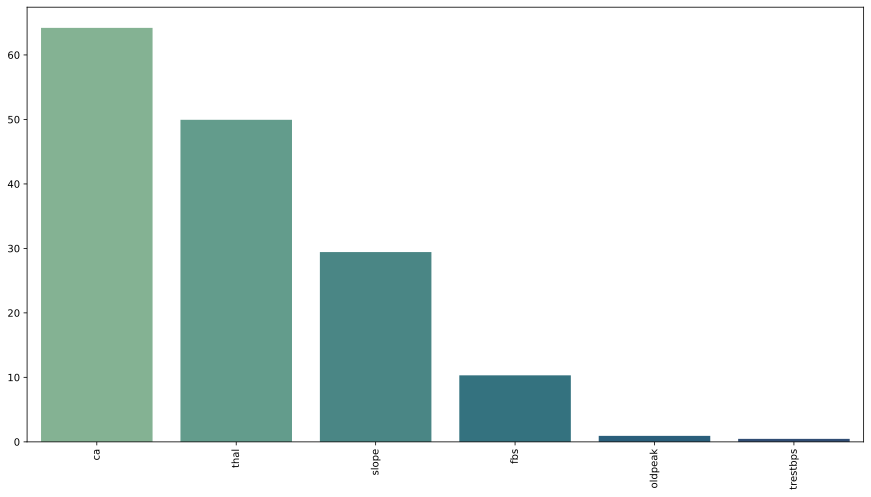

In [37]:
df=df.dropna(subset=['exang','thalch'],axis=0,how='all')
plot_missing(check_null_counts(df,0))

In [38]:
df[df.trestbps.isnull()]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
599,600,35,Male,Switzerland,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
762,763,61,Male,VA Long Beach,asymptomatic,NaN,0.0,True,st-t abnormality,86.0,False,1.5,flat,NaN,reversable defect,3
768,769,59,Male,VA Long Beach,non-anginal,NaN,0.0,False,normal,128.0,True,2.0,downsloping,NaN,NaN,2
880,881,62,Male,VA Long Beach,asymptomatic,NaN,170.0,False,st-t abnormality,120.0,True,3.0,NaN,NaN,NaN,4


In [39]:
df1=df.dropna(subset=['trestbps','ca'],axis=0,how='all')
len(df1)/920

0.933695652173913

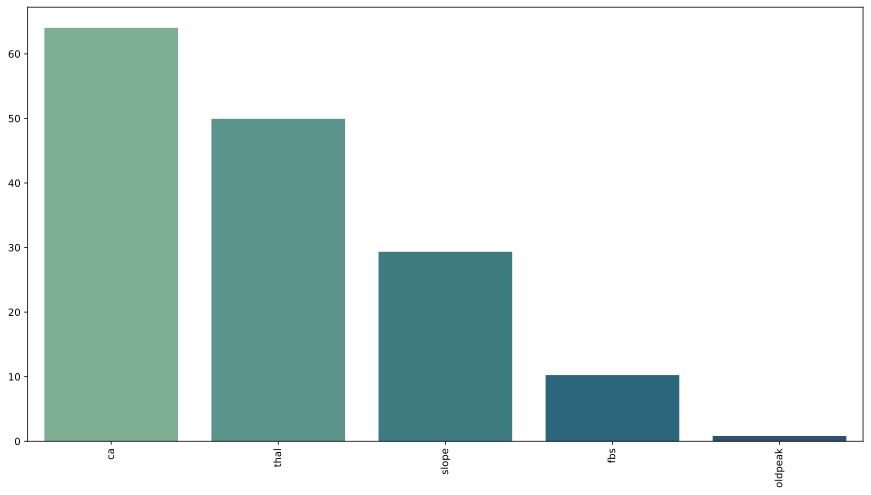

In [40]:
#Lets drop these 
df=df.dropna(subset=['trestbps','ca'],axis=0,how='all')
plot_missing(check_null_counts(df,0))

#lets work on oldpeak

In [41]:
df[df.oldpeak.isnull()]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
606,607,38,Male,Switzerland,asymptomatic,150.0,0.0,NaN,normal,120.0,True,NaN,NaN,NaN,normal,1
636,637,52,Male,Switzerland,asymptomatic,95.0,0.0,NaN,normal,82.0,True,NaN,NaN,NaN,NaN,2
705,706,65,Male,Switzerland,asymptomatic,145.0,0.0,NaN,st-t abnormality,67.0,False,NaN,NaN,NaN,fixed defect,3
707,708,65,Male,Switzerland,asymptomatic,160.0,0.0,True,st-t abnormality,122.0,False,NaN,NaN,NaN,reversable defect,3
790,791,55,Male,VA Long Beach,atypical angina,110.0,214.0,True,st-t abnormality,180.0,False,NaN,NaN,NaN,NaN,0
817,818,62,Male,VA Long Beach,typical angina,112.0,258.0,False,st-t abnormality,150.0,True,NaN,NaN,NaN,NaN,1
858,859,53,Male,VA Long Beach,non-anginal,155.0,175.0,True,st-t abnormality,160.0,False,NaN,NaN,NaN,fixed defect,0


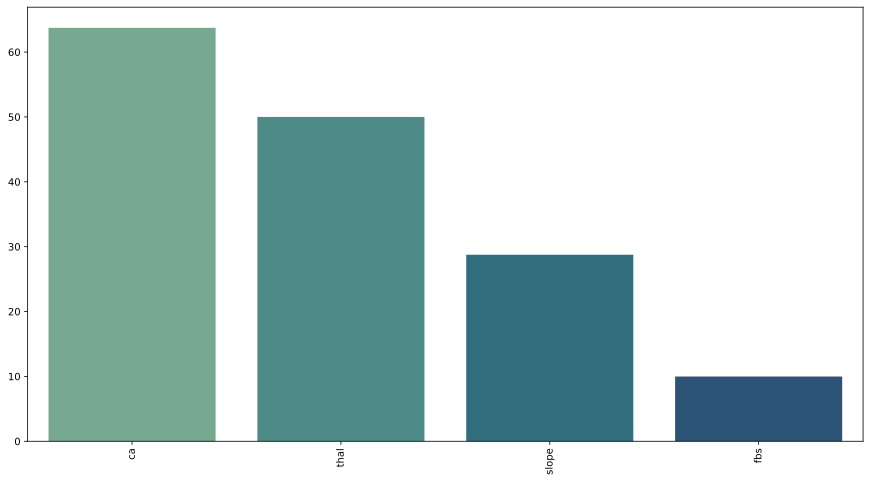

In [42]:
#Lets drop these 
df=df.dropna(subset=['oldpeak','slope','ca'],axis=0,how='all')
plot_missing(check_null_counts(df,0))

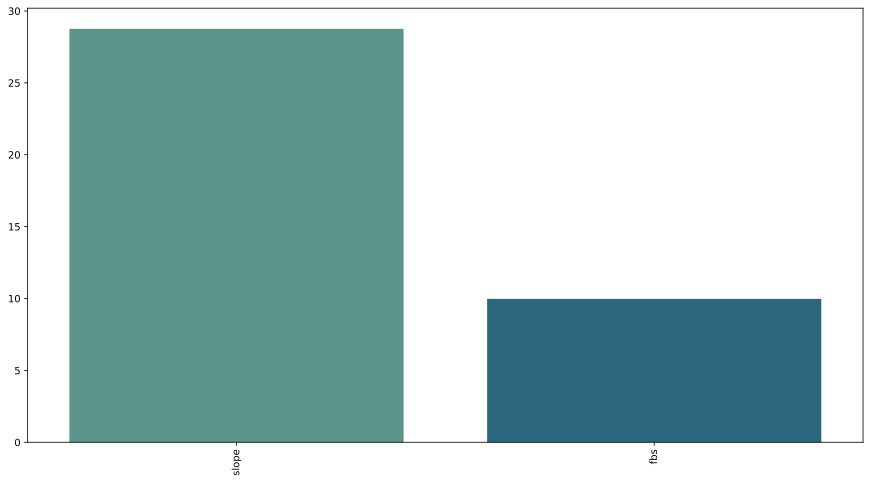

In [43]:
#lets remove the columns having 50% missing data along with id
df.drop(['id', 'ca', 'thal'],axis=1,inplace=True)
plot_missing(check_null_counts(df,0))

Removing Column needs to be an well thought decision ..once we remove these features model wil never be able to utilize these features even if available in future data

#lets work on fbs

In [44]:
df1=df.dropna(subset=['fbs','slope'],axis=0,how='all')
len(df1)/920

0.907608695652174

If we drop these rows w will continue with 90 % of original data...Lets drop it...we may do some further reaseacrh how to impute missing values

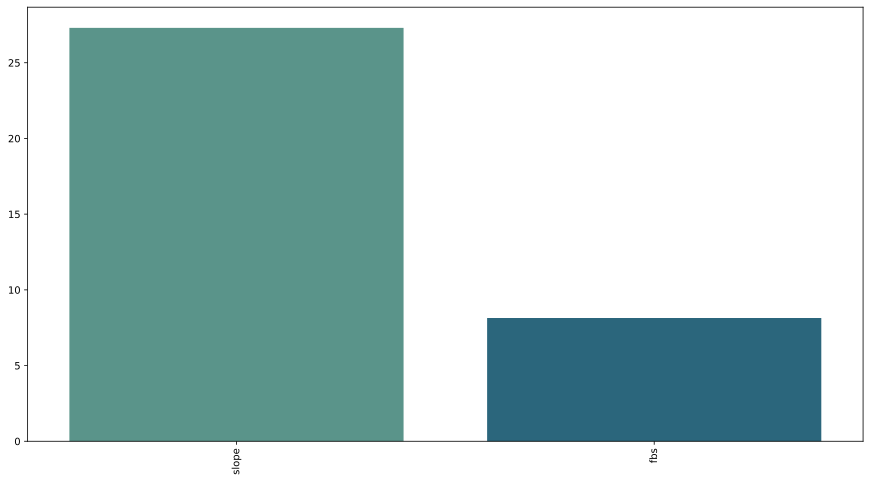

In [45]:
df=df.dropna(subset=['fbs','slope'],axis=0,how='all')
plot_missing(check_null_counts(df,0))

In [46]:
df.drop(['slope','fbs'],axis=1,inplace=True)

In [47]:
df_ob=df.select_dtypes(include='object')
df_ob

,sex,dataset,cp,restecg,exang
0,Male,Cleveland,typical angina,lv hypertrophy,False
1,Male,Cleveland,asymptomatic,lv hypertrophy,True
2,Male,Cleveland,asymptomatic,lv hypertrophy,True
3,Male,Cleveland,non-anginal,normal,False
4,Female,Cleveland,atypical angina,lv hypertrophy,False
...,...,...,...,...,...
913,Male,VA Long Beach,asymptomatic,st-t abnormality,True
914,Male,VA Long Beach,asymptomatic,normal,False
915,Female,VA Long Beach,asymptomatic,st-t abnormality,False
917,Male,VA Long Beach,asymptomatic,st-t abnormality,False


In [48]:
df_num=df.select_dtypes(exclude='object')
df_num

,age,trestbps,chol,thalch,oldpeak,num
0,63,145.0,233.0,150.0,2.3,0
1,67,160.0,286.0,108.0,1.5,2
2,67,120.0,229.0,129.0,2.6,1
3,37,130.0,250.0,187.0,3.5,0
4,41,130.0,204.0,172.0,1.4,0
...,...,...,...,...,...,...
913,62,158.0,170.0,138.0,0.0,1
914,46,134.0,310.0,126.0,0.0,2
915,54,127.0,333.0,154.0,0.0,1
917,55,122.0,223.0,100.0,0.0,2


In [49]:
df_ob_dumm=pd.get_dummies(df_ob,drop_first=True)
df_ob_dumm

,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True
0,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,0,0,0,0,1,1
914,1,0,0,1,0,0,0,1,0,0
915,0,0,0,1,0,0,0,0,1,0
917,1,0,0,1,0,0,0,0,1,0


In [50]:
workingdf=pd.concat([df_ob_dumm,df_num],axis=1)
workingdf

,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,age,trestbps,chol,thalch,oldpeak,num
0,1,0,0,0,0,0,1,0,0,0,63,145.0,233.0,150.0,2.3,0
1,1,0,0,0,0,0,0,0,0,1,67,160.0,286.0,108.0,1.5,2
2,1,0,0,0,0,0,0,0,0,1,67,120.0,229.0,129.0,2.6,1
3,1,0,0,0,0,1,0,1,0,0,37,130.0,250.0,187.0,3.5,0
4,0,0,0,0,1,0,0,0,0,0,41,130.0,204.0,172.0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,0,0,1,0,0,0,0,1,1,62,158.0,170.0,138.0,0.0,1
914,1,0,0,1,0,0,0,1,0,0,46,134.0,310.0,126.0,0.0,2
915,0,0,0,1,0,0,0,0,1,0,54,127.0,333.0,154.0,0.0,1
917,1,0,0,1,0,0,0,0,1,0,55,122.0,223.0,100.0,0.0,2


# Data Split & Feature Scaling 

In [51]:

X=workingdf.drop('num',axis=1)
y=workingdf.num
y.head()


0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
#Scaling
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

# Model Building- Simple Logistic regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model=LogisticRegression()

In [58]:
model.fit(X_train,y_train)

LogisticRegression()

In [59]:
pred=model.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [61]:
print('Accuracy Scores :\n', accuracy_score(y_test,pred))
print('\nConfusion Metrics :\n', confusion_matrix(y_test,pred))
print('\nClassification Report :\n', classification_report(y_test,pred))


Accuracy Scores :
 0.5748502994011976

Confusion Metrics :
 [[69  8  0  1  0]
 [10 19  2  9  0]
 [ 3 10  4  8  0]
 [ 5  8  1  4  0]
 [ 0  2  1  3  0]]

Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.88      0.84        78
           1       0.40      0.47      0.44        40
           2       0.50      0.16      0.24        25
           3       0.16      0.22      0.19        18
           4       0.00      0.00      0.00         6

    accuracy                           0.57       167
   macro avg       0.37      0.35      0.34       167
weighted avg       0.56      0.57      0.55       167



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.metrics import ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay

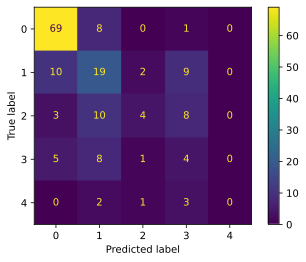

In [63]:
cm=confusion_matrix(y_test,pred,labels=model.classes_)
ConfusionMatrixDisplay(cm,display_labels=model.classes_).plot()


# Model Building-  Logistic regression - Parametric Experiments

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# help(LogisticRegression)

In [66]:
model=LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000,)

In [67]:
penalty=['l1','l2','elasticnet']
l1_ratio=np.linspace(0,1,20)
C=np.linspace(0,1,20)

param_grid={'penalty':penalty,
            'l1_ratio':l1_ratio,
            'C':C
            }



In [68]:
grid_model=GridSearchCV(model,param_grid=param_grid,verbose=0,cv=10);

In [69]:
grid_model.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/loca

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [70]:
grid_model.best_params_

{'C': 0.21052631578947367,
 'l1_ratio': 0.15789473684210525,
 'penalty': 'elasticnet'}

In [71]:
pred=grid_model.predict(X_test)

In [72]:
print('Accuracy Scores :\n', accuracy_score(y_test,pred))
print('\nConfusion Metrics :\n', confusion_matrix(y_test,pred))
print('\nClassification Report :\n', classification_report(y_test,pred))


Accuracy Scores :
 0.592814371257485

Confusion Metrics :
 [[71  7  0  0  0]
 [12 23  1  4  0]
 [ 3 18  2  2  0]
 [ 5  9  1  3  0]
 [ 0  4  0  2  0]]

Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        78
           1       0.38      0.57      0.46        40
           2       0.50      0.08      0.14        25
           3       0.27      0.17      0.21        18
           4       0.00      0.00      0.00         6

    accuracy                           0.59       167
   macro avg       0.39      0.35      0.33       167
weighted avg       0.56      0.59      0.54       167



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
model=LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.15,C=.21)

In [77]:
model.fit(X_train,y_train)

LogisticRegression(C=0.21, l1_ratio=0.15, penalty='elasticnet', solver='saga')

In [78]:
print('Accuracy Scores :\n', accuracy_score(y_test,pred))
print('\nConfusion Metrics :\n', confusion_matrix(y_test,pred))
print('\nClassification Report :\n', classification_report(y_test,pred))

Accuracy Scores :
 0.592814371257485

Confusion Metrics :
 [[71  7  0  0  0]
 [12 23  1  4  0]
 [ 3 18  2  2  0]
 [ 5  9  1  3  0]
 [ 0  4  0  2  0]]

Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        78
           1       0.38      0.57      0.46        40
           2       0.50      0.08      0.14        25
           3       0.27      0.17      0.21        18
           4       0.00      0.00      0.00         6

    accuracy                           0.59       167
   macro avg       0.39      0.35      0.33       167
weighted avg       0.56      0.59      0.54       167



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
